In [8]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data_dir = "phosphate_dmrg_data"
all_files = os.listdir(data_dir)
output_files = [f for f in all_files if "output" in f]
print(output_files)

['output_1.json', 'output_0.json', 'output_7.json', 'output_6.json', 'output_5.json', 'output_8.json', 'output_4.json', 'output_3.json', 'output_2.json']


In [10]:
records = [] # List of (mps_bond, mpo_bond, energy) tuples
for f in output_files:
    with open(data_dir + "/" + f, "r") as fp:
        output_dict = json.load(fp)
    mps_bond = output_dict["input"]["max_bond"]
    mpo_bond = output_dict["input"]["max_mpo_bond"]
    energy = output_dict["energy"]
    records.append((mps_bond, mpo_bond, energy))
df = pd.DataFrame.from_records(records, columns=["mps_bond", "mpo_bond", "energy"])
print(df.head())

   mps_bond  mpo_bond    energy
0        20        10 -5.288661
1        10        10 -5.288546
2        20        30 -2.229594
3        10        30 -2.317789
4        30        20 -4.346794


<Axes: xlabel='mps_bond', ylabel='energy'>

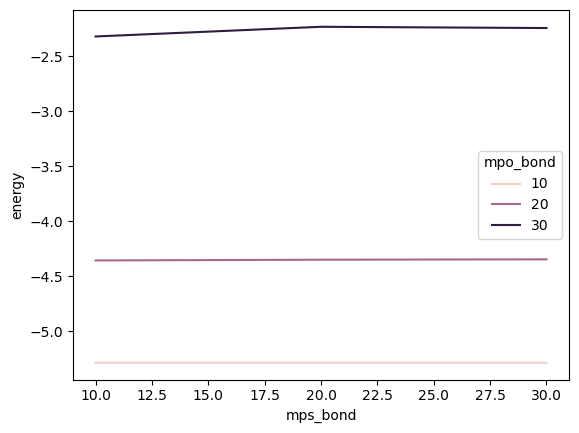

In [11]:
fig, ax = plt.subplots()
sns.lineplot(ax=ax, data=df, x="mps_bond", y="energy", hue="mpo_bond")